# Метод Роу

In [19]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot 
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## Постановка задачи

Задача Римана для одномерной нестационарной системы уравнений Эйлера прелставлеяет собой задачу Коши для законов сохранения

\begin{equation}
\label{eq:euler}
\left . 
\begin{array}{c}
\mathbf{U}_t + \mathbf{F}(\mathbf{U})_x = 0, \\
\mathbf{U} = \left[\begin{array}{c}\rho \\ \rho u  \\E \end{array}\right], 
\mathbf{F} = \left[\begin{array}{c}\rho u \\ \rho u^2+p  \\ u(E+p) \end{array}\right],
\end{array}
\right\}
\end{equation}

с начальными условиями

\begin{equation}
\mathbf{U}(x,0)=\mathbf{U}^{(0)}(x) = 
\left \{ 
\begin{array}{c}
\mathbf{U}_L ~\textrm{если} ~x<0, \\
\mathbf{U}_R ~\textrm{если} ~x>0.
\end{array}
\right .
\end{equation}

При решении задачи Римана будем использовать вектор примитивных переменных $\mathbf{W} = (\rho, u, p)^T$ вместо консервативных переменных (вектор $\mathbf{U}$). Тогда начальные условия задаются в виде двух векторов $\mathbf{W}_L = (\rho_L, u_L, p_L)^T$ для области слева от $x=0$ и $\mathbf{W}_R = (\rho_R, u_R, p_R)^T$ для области справа от $x=0$, области разделены скачком в $x=0$. Нужно найти решение в области, обозначенной на рисунке как _Star Region_.

![Схема задачи Римана](./figures/star_region.png "Схема задачи Римана")



## Линеаризация Роу

Если ввести матрицу Якоби $ \mathbf{A}(\mathbf{U}) = \frac {\partial \mathbf{F}}  {\partial \mathbf{U}}$, система уравнений $\ref{eq:euler}$ может быть записана в виде

$$
\mathbf{U}_t + \mathbf{A}(\mathbf{U})\mathbf{U}_x = 0
$$

Согласно подходу Роу, матрица Якоби $ \mathbf{A}(\mathbf{U})$ заменяется на матрицу с постоянными элементами 
$\tilde{\mathbf{A}} =\tilde{\mathbf{A}} (\mathbf{U}_L, \mathbf{U}_R)$, которая определяется по значениям начальных условий по обе стороны от разрыва. Тогда исходное уравнение в частных производных заменяется уравенинем 

$$
\mathbf{U}_t + \tilde{\mathbf{A}}\mathbf{U}_x = 0
$$

Таким образом, исходная _нелинейная_ задача Римана заменяется лианеризрванной задачей Римана 

$$
\begin{equation}
\label{eq:roe}
\left . 
\begin{array}{c}
\mathbf{U}_t + \tilde{\mathbf{A}}\mathbf{U}_x = 0, \\
\mathbf{U}(x,0)= 
\left \{ 
\begin{array}{c}
\mathbf{U}_L, ~x<0 \\
\mathbf{U}_R,~x>0
\end{array}
\right .
\end{array}
\right\}
\end{equation},
$$
которая решается точно.

Если известна матрица $\tilde{\mathbf{A}} =\tilde{\mathbf{A}} (\mathbf{U}_L, \mathbf{U}_R)$, ее собственные числа $\tilde{\lambda_i}(\mathbf{U}_L, \mathbf{U}_R)$ и соственные векторы $\tilde{\mathbf{K}}^{(i)} (\mathbf{U}_L, \mathbf{U}_R)$, то лианеризованная задача Римана может быть решена стандартным для гиперболической системы дифференциальных уравнений с постоянными коэффициентами способом.

Найдем коэффициенты разложения начальных условий по собственными векторам, решив систему уравнений

$$
\Delta \mathbf{U} = \mathbf{U}_R - \mathbf{U}_L = \sum_{i=1}^m \tilde{\alpha_i}\mathbf{K}^i
$$

Тогда решение $\mathbf{U}_{i+\frac{1}{2}}(x/t)$ на оси $t$, то есть при $x/t = 0$, запишется в виде

$$
\mathbf{U}_{i+\frac{1}{2}}(0) = \mathbf{U}_L + \sum_{\tilde{\lambda}_i\le0}\tilde{\alpha}_i\tilde{\mathbf{K}^{(i)}},
$$

или

$$
\mathbf{U}_{i+\frac{1}{2}}(0) = \mathbf{U}_R - \sum_{\tilde{\lambda}_i\ge0}\tilde{\alpha}_i\tilde{\mathbf{K}^{(i)}}
$$

Но нам неужно посчитать потоки на грани. Несмотря на то, что мы решаем линейную систему уравнений 
$$
\overline{\mathbf{U}}_t + \overline{\mathbf{F}}(\overline{\mathbf{U}})_x = 0,
$$

где поток заптсывается как $\overline{\mathbf{F}}(\overline{\mathbf{U}}) = \tilde{\mathbf{A}}\overline{\mathbf{U}}$, аналогичное соотношение для потока на грани будет _неверным_! То есть

$$
\mathbf{F}_{i+\frac{1}{2}} \ne \tilde{\mathbf{A}}\overline{\mathbf{U}}_{i+\frac{1}{2}}(0)
$$

Для того чтобы получить верное соотношение для потока на линии разрыва (будущая грань ячейки расчетной сетки), запишем интегральный закон сохранения для левой части рисунка

![Контрольный объем](./figures/star_reg_control_volume.png)

$$
\int_{TS_L}^0\mathbf{U}(x,T)dx = -TS_L\mathbf{U}_L + T(\mathbf{F}_L - \mathbf{F}_{0L}),
$$

где $\mathbf{F}_{0L}$ — поток $\mathbf{F}(\mathbf{U})$ на оси $t$. Выразим его из полученного соотношения:

$$
\mathbf{F}_{0L} = \mathbf{F}_{L} - S_L\mathbf{U}_L - \frac{1}{T}\int_{TS_L}^0\mathbf{U}(x,T)dx
$$.

Аналогично для $\mathbf{F}_{0R}$ можно записать

$$
\mathbf{F}_{0R} = \mathbf{F}_{R} - S_R\mathbf{U}_R + \frac{1}{T}\int_0^{TS_R}\mathbf{U}(x,T)dx
$$.

Пусть $\overline{\mathbf{U}}_{i+\frac{1}{2}}(x,t)$ – решение лианеризованной задачи Римана с начальными условиями $\mathbf{U}_L$ и $\mathbf{U}_R$, тогда интегралы в выражениях, записанных выше, приобретут следующий вид:

$$
\int_{TS_L}^0\overline{\mathbf{U}}_{i+\frac{1}{2}}(x,T)dx = T\left[\overline{\mathbf{F}}(\mathbf{U}_L) - 
\overline{\mathbf{F}}(\overline{\mathbf{U}}_{i+\frac{1}{2}}(0)) \right] - TS_L\mathbf{U}_L
$$
и
$$
\int_0^{TS_R}\overline{\mathbf{U}}_{i+\frac{1}{2}}(x,T)dx = T\left[ \overline{\mathbf{F}}(\overline{\mathbf{U}}_{i+\frac{1}{2}}(0))
-\overline{\mathbf{F}}(\mathbf{U}_L)  \right] + TS_R\mathbf{U}_R.
$$

Подставим полученные интегралы и преобразуем выражения для потока на оси $t$:

$$
\mathbf{F}_{0L} = \overline{\mathbf{F}}(\overline{\mathbf{U}}_{i+\frac{1}{2}}(0)) +  \mathbf{F}(\mathbf{U}_L) - \overline{\mathbf{F}}(\mathbf{U}_L) 
$$

и
$$
\mathbf{F}_{0R} = \overline{\mathbf{F}}(\overline{\mathbf{U}}_{i+\frac{1}{2}}(0)) +  \mathbf{F}(\mathbf{U}_R) - \overline{\mathbf{F}}(\mathbf{U}_R) 
$$.

Наконец, используя выражение для $\overline{\mathbf{U}}_{i+\frac{1}{2}}(0)$ и определение потока $\overline{\mathbf{F}} = \tilde{\mathbf{A}}\overline{\mathbf{U}}$, запишем для потока на оси $t$:

$$
\mathbf{F}_{i+\frac{1}{2}} = \mathbf{F}_L + \sum_{\tilde{\lambda}_i\le0}\tilde{\alpha}_i \tilde{\lambda}_i \tilde{\mathbf{K}^{(i)}},
$$

$$
\mathbf{F}_{i+\frac{1}{2}} = \mathbf{F}_R - \sum_{\tilde{\lambda}_i\ge0}\tilde{\alpha}_i \tilde{\lambda}_i \tilde{\mathbf{K}^{(i)}}.
$$

Полученные выражения можно объединить в одно:

$$
\mathbf{F}_{i+\frac{1}{2}} = \frac{1}{2}(\mathbf{F}_L + \mathbf{F}_R) - \frac{1}{2}\sum_{i=1}^m\tilde{\alpha}_i \left|\tilde{\lambda}_i\right| \tilde{\mathbf{K}^{(i)}}.
$$

Полученные выражения для решения и потока на грани справедливы для _любой_ гиперболической системы уравнений. Специфическмим для метода Роу являтся только сами значения коэффициентов разложения начальных условий по собственными векторам $\tilde{\alpha}_i$, собственные числа $\tilde{\lambda}_i$ и собственные векторы $\tilde{\mathbf{K}}^{(i)}$ матрицы Роу $\tilde{\mathbf{A}} (\mathbf{U}_L, \mathbf{U}_R)$. Заметим, что сама матрица нигде в вычислениях не участвует.

### Реализация метода для системы уравнений Эйлера

Определим некоторый набор костантных выражений с показателем степени адиабаты $\gamma = 1.4$

In [20]:
gamma = 1.4     #Гамма, она же каппа
#Различные формулы из гаммы
g_m_1_over_2g = (gamma-1)/2/gamma      #g1
g_p_1_over_2g = (gamma+1)/2/gamma      #g2
g_m_1_over_2g_inv = 1/g_m_1_over_2g    #g3
g_m_1_over_2_inv = 2/(gamma-1)         #g4
g_p_1_over_2_inv = 2/(gamma+1)         #g5
g_m_1_over_g_p_1 = (gamma-1)/(gamma+1) #g6
g_m_1_over_2 = (gamma-1)/2             #g7
g_m_1 = gamma-1  

tol = 1e-8

Нам потребуется вычислять скорость звука $$a = \sqrt{\gamma \frac{p}{\rho}}$$ и энтальпию $$H = \frac{1}{2}u^2 + \frac{\gamma}{\gamma -1}\frac{p}{\rho},$$ поэтому создадим для них соответсвующие функции. На вход в функции будем подавать вектор примитивных переменных $\mathbf{W}$.

In [21]:
def sound_speed(W):
    d = W[0]
    p = W[2]
    return (gamma*(p/d))**0.5

In [22]:
def enthalpy(W):
    return 0.5*W[1]**2 + gamma/ g_m_1 *(W[2]/W[0])

Следующая функция задает начальные условия для трех тестов: задачи Сода, двух волн разрежения и задачи Вудварда. Описание тестов можно найти на странице 226 учебника Торо.

In [23]:
def init(case):
    if case == 'sod':
        W_l = np.array([1, 0.75, 1])
        W_r = np.array([0.125, 0, 0.1])
        t = 0.25
    elif case == '123':
        W_l = np.array([1, -2, 0.4])
        W_r = np.array([1, 2, 0.4])
        t = 0.15
    elif case == 'left-woodward':
        W_l = np.array([1, 0, 1000])
        W_r = np.array([1, 0, 0.1])
        
        t = 0.012
    else : print('Unknown case!')
    return W_l, W_r, t

Следующие три функции носят вспомогательный характер `U_to_W` переводит вектор консервативных величин $\mathbf{U}$ в вектор неконсервативных $\mathbf{W}$ величин. Функуция `W_to_U` делает обратное преобразование. Наконец, `flux` возрващает вектор потока, посчитанный по примитивным переменным.

In [24]:
def U_to_W(U):
    W = np.zeros_like(U)
    W[0] = U[0]
    W[1] = U[1]/U[0]
    W[2] = g_m_1*(U[2] - 0.5*U[1]**2/U[0])
    return W


In [25]:
def W_to_U(W):
    U = np.zeros_like(W)
    U[0] = W[0]
    U[1] = W[1]*W[0]
    U[2] = 0.5*W[1]**2*W[0]+W[2]/ g_m_1
    return U


In [26]:
def flux(W):
    F = np.zeros_like(W)
    F[0] = W[1]*W[0]
    F[1] = W[1]**2*W[0] + W[2]
    F[2] = W[1]*(0.5*W[1]**2*W[0]+W[2]/ g_m_1 + W[2])
    return F

Теперь можно приступить к функциям, реализующим метод Роу. Собственные векторы матрицы Роу формально совпадают с собственными векторами матрицы Якоби для системы уравнений Эйлера, с той лишь разницей, что для вычисления их используются величины, осредненные по Роу:
$$
\begin{equation}
\begin{array}{c}
\tilde{u} = \frac{\sqrt{\rho_L} u_R + \sqrt{\rho_R} u_R}{\sqrt{\rho_L} + \sqrt{\rho_R}}\\
\tilde{H} = \frac{\sqrt{\rho_L} H_R + \sqrt{\rho_R} H_R}{\sqrt{\rho_L} + \sqrt{\rho_R}}\\
\tilde{a} = \left( (\gamma -1 )(\tilde{H} - \frac{1}{2}\tilde{u}^2) \right)^\frac{1}{2}
\end{array}
\end{equation}
$$

Соответсвующую этой операции функцию назовем `roe_average`

In [27]:
def roe_average(Wl,Wr):
    denom = Wl[0]**0.5 + Wr[0]**0.5
    u_tilda = (Wl[0]**0.5 * Wl[1] + Wr[0]**0.5 * Wr[1])/ denom
    H_tilda = (Wl[0]**0.5 * enthalpy(Wl) + Wr[0]**0.5 * enthalpy(Wr))/ denom
    a_tilda = (g_m_1*(H_tilda - 0.5*u_tilda**2))**0.5
    return u_tilda, H_tilda, a_tilda 

Собственные числа матрицы Роу:
$$
\tilde{\lambda}_1 = \tilde{u} - \tilde{a}, \ \tilde{\lambda}_2 = \tilde{u}, \ \tilde{\lambda}_3 = \tilde{u} + \tilde{a} 
$$

In [28]:
def roe_eigen_values(roe_average):
    lambdas = np.zeros(3)
    lambdas[0] = roe_average[0] - roe_average[2]
    lambdas[1] = roe_average[0] 
    lambdas[2] = roe_average[0] + roe_average[2]
    return lambdas

Собвенные векторы:

$$
\tilde{\mathbf{K}}^1 =\left [ \begin{array}{c} 1\\ \tilde{u} - \tilde{a} \\ \tilde{H} -  \tilde{u}\tilde{a} \end{array}  \right] ; \ \tilde{\mathbf{K}}^2 =\left [ \begin{array}{c} 1\\ \tilde{u}             \\ \frac{1}{2} \tilde{u}^2         \end{array}  \right]; \ 
\tilde{\mathbf{K}}^3 =\left [ \begin{array}{c} 1\\ \tilde{u} + \tilde{a} \\ \tilde{H} +  \tilde{u}\tilde{a} \end{array}  \right]
$$

In [29]:
def roe_eigen_vectors(roe_average):
    K = np.zeros((3,3))
    K[0] = np.asarray([1, 
                       roe_average[0] - roe_average[2], 
                       roe_average[1] - roe_average[0] * roe_average[2] ])
    K[1] = np.asarray([1, 
                       roe_average[0] , 
                       0.5*roe_average[0] **2 ])
    K[2] = np.asarray([1, 
                       roe_average[0] + roe_average[2], 
                       roe_average[1] + roe_average[0] * roe_average[2] ])
    return K

Коэффициенты разложения вектора начальных условий по собственными векторам матрицы Роу находятся как решение системы уравнений
$$
\Delta\mathbf{U} = \sum_{i=1}^3\tilde{\alpha_i}\tilde{\mathbf{K}}^{(i)}
$$
или
$$
\begin{array}{c}
\tilde{\alpha}_1                       +\tilde{\alpha}_2         +\tilde{\alpha}_3                      = \Delta u_1 \\
\tilde{\alpha}_1(\tilde{u} - \tilde{a})+\tilde{\alpha}_2\tilde{u}+\tilde{\alpha}_3(\tilde{u} + \tilde{a}) = \Delta u_2 \\
\tilde{\alpha}_1(\tilde{H} -  \tilde{u}\tilde{a} )+\tilde{\alpha}_2\frac{1}{2} \tilde{u}^2+\tilde{\alpha}_3(\tilde{H} +  \tilde{u}\tilde{a}) = \Delta u_3
\end{array}
$$

Решением этой системы будут значения:
$$
\begin{array}{c}
\tilde{\alpha}_2 = \frac{\gamma -1}{\tilde{a}^2}\left[\Delta u_1(\tilde{H} - \tilde{u}^2) + \tilde{u}\Delta u_2 - \Delta u_3 \right] \\
\tilde{\alpha}_1 = \frac{1}{2\tilde{a}}\left[ \Delta u_1 (\tilde{u} + \tilde{a}) -  \Delta u_2 -  \tilde{a}\tilde{\alpha}_2 \right]\\
\tilde{\alpha}_3 = \Delta u_1 - (\tilde{\alpha}_1 + \tilde{\alpha}_2)
\end{array}
$$

Для их вычисления создадим функцию `alphas`.

In [30]:
def alfas(dU, roe_average):
    alfas = np.zeros(3)
    alfas[1] = g_m_1/roe_average[2]**2*(dU[0]*(roe_average[1] - roe_average[0]**2) + dU[1]*roe_average[0] - dU[2] )
    alfas[0] = 0.5/roe_average[2]*(dU[0]*(roe_average[0] + roe_average[2]) - dU[1] - roe_average[2]*alfas[1])
    alfas[2] = dU[0] - (alfas[0] +alfas[1])
    return alfas


Наконец, вычисляем потоки Роу по формуле

$$
\mathbf{F}_{i+\frac{1}{2}} = \frac{1}{2}(\mathbf{F}_L + \mathbf{F}_R) - \frac{1}{2}\sum_{i=1}^m\tilde{\alpha}_i \left|\tilde{\lambda}_i\right| \tilde{\mathbf{K}^{(i)}}.
$$

In [31]:
def roe_flux(Wl,Wr):
    Fl,Fr = flux(Wl),flux(Wr)
    averages = roe_average(Wl,Wr)
    lambdas = roe_eigen_values(averages)
    K = roe_eigen_vectors(averages)
    alphas = alfas(W_to_U(Wr) - W_to_U(Wl), averages)
    roe_flux = 0.5*(Fl + Fr - np.dot(alphas*abs(lambdas),K))
    return roe_flux

Теперь все гтово к тестированию. Задаем количество узлов Расчетной сетки $N=101$ и положение разрыва на оси $x$

In [32]:
N_points = 101
x = np.linspace(0,1,N_points)
decay_pos = 0.3
W_correct= np.zeros((N_points,3))

Задаем началные условия

In [39]:
dx = 1./(N_points - 1)
sigma = 0.9

W = np.zeros((N_points,3))
fluxes = np.zeros((N_points - 1,3))
U = np.zeros_like(W) 

In [40]:
W_l,W_r,t = init('sod')
W[np.where(x<decay_pos),:] = W_l
W[np.where(x>=decay_pos),:] = W_r

Для того, чтобы сделать шаг по времени, нужно определить величину этого шага, исходя из уловия устойчивости 
$$
\Delta t = \frac{\sigma \Delta x}{S_{max}^n},
$$
где число Куранта-Фридрихса-Леви $0 \lt \sigma \le 1$. Для этого нужно оценить максимальную скорость распространения возмущений на каждом временном слое. Воспользуемся оценкой $$ S_{max}^n = \max\limits_{i}\{\left|u_i^n\right| + a_i^n\},$$
учебник Торо, стр. 221.

In [41]:
t_ = 0
#dt = 0.0002
U_n = np.copy(U)
while t_<t:
    U = W_to_U(W.T).T
    roe_fluxes = np.zeros((N_points - 1,3))
    speeds = np.zeros(N_points - 1)
    for i,x_ in enumerate(x[:-1]):
        
        roe_fluxes[i] =roe_flux(W[i],W[i+1])
        c_l = sound_speed(W[i])
        c_r = sound_speed(W[i+1])
        speeds[i] = max(abs(W[i][1])+c_l,abs(W[i+1][1])+  c_r)

    
    dt = sigma*dx/max(speeds)
    U_n[1:-1,:] = U[1:-1,:] + dt/dx*(roe_fluxes[:-1,:]-roe_fluxes[1:,:]) 
    U_n[0,:] = U_n[1,:]
    U_n[-1,:] = U_n[-2,:]
    W = U_to_W(U_n.T).T
    t_=t_+dt

В следующей ячейке используется _магическая_ комманда Jupyter, позволяющая обмениваться переменными между разными ноутбуками. В соседнем ноутбуке у меня реализовано точное решение задачи Римана, результат хранися в переменной `W_correct`. При помощи команды
```pyton
%store W_correct
```
я сделал ее доступным в других запущенных ноутбуках.

In [49]:
%store -r

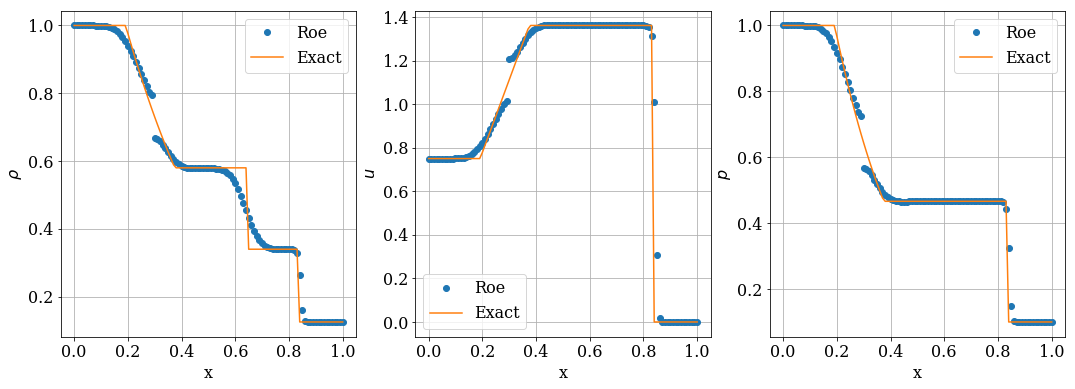

In [53]:
fig,axs = pyplot.subplots(1,3,figsize=(18,6) )

for ax, W_,  W_c, y_label in zip(axs, W.T,  W_correct.T, (r'$\rho$',r'$u$',r'$p$') ):
    ax.plot(x,W_,'o',label='Roe')
#    ax.plot(x,W_g_,'o',label='Godunov')
    ax.plot(x,W_c,label='Exact')
    ax.set_ylabel(y_label)
    ax.set_xlabel('x')
    scale_y = 1.1*abs(max(W_c)-min(W_c))
    ax.set_ylim(0.5*(max(W_c)+min(W_c) - scale_y), 0.5*(max(W_c)+min(W_c) + scale_y))
    ax.legend(loc='best')
    ax.grid()
    

### Вопросы

1. На волне разрежения наблюдается разрыв, откуда он тут взялся?
2. Работают ли другие тесты? Если нет, почему?

In [36]:
W_roe = np.copy(W)
%store W_roe

Stored 'W_roe' (ndarray)
